<a href="https://colab.research.google.com/github/khushijashnani/CEEL-82B---Data-Science/blob/master/Exp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Experiment 3


Name - Khushi Jashnani

UID - 2018130017

###**Objective**: 

1. Apply Naive bayes classifier for given data see Naive_bayes_handout.zip file in edmodo.

2. Apply and compare Linear Discriminating Analysis with Naive bayes classifiers w.r.t. error, specificity and sensitivity



### Description:

The dataset is comprised of tab-separated files with phrases from the IMDB Movie Ratings. The train/test split has been preserved for the purposes of benchmarking, but the sentences have been shuffled from their original order. Each Sentence has been parsed into many phrases by the Stanford parser. Each phrase has a PhraseId. Each sentence has a SentenceId. Phrases that are repeated (such as short/common words) are only included once in the data.

The sentiment labels are:

0 - negative
1 - positive


## 1. Loading the Dataset

In [ ]:
!pip install scikit-plot

You should consider upgrading via the '/usr/bin/python3.6 -m pip install --upgrade pip' command.


In [ ]:
!pip install seaborn

     |████████████████████████████████| 292 kB 14.1 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3.6 -m pip install --upgrade pip' command.


In [ ]:
!pip install nltk

     |████████████████████████████████| 1.5 MB 14.6 MB/s eta 0:00:01
     |████████████████████████████████| 748 kB 44.8 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 9.3 MB/s  eta 0:00:01
You should consider upgrading via the '/usr/bin/python3.6 -m pip install --upgrade pip' command.


In [ ]:
#Importing the necessary librarires

import math
import nltk
import scipy
import string
import numpy as np
import pandas as pd
import seaborn as sns

from tqdm import tqdm
from scipy.stats import randint
from nltk.corpus import stopwords
from scipy.stats import loguniform

from sklearn.decomposition import PCA
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from scikitplot.metrics import plot_roc_curve as auc_roc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve, precision_score, recall_score
from IPython.display import display

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [ ]:
# Connecting/Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

%cd drive/MyDrive/Colab Notebooks/DS/Labs/Exp3

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/DS/Labs/Exp3


In [ ]:
# Loading the dataset

df = pd.read_csv('movie.csv')
target = 'label'
df.reset_index(drop=True, inplace=True)
original_df = df.copy(deep=True)
display(df.head())
print("\nSize of the dataset is : ", df.shape)

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1



Size of the dataset is :  (40000, 2)


**Analysis:** The Dataset consists of 2 features & 40000 samples.

In [ ]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [ ]:
#Checking the stats of all the columns

display(df.describe())

,label
count,40000.000000
mean,0.499525
std,0.500006
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


**Analysis:** The stats seem to be fine, let us gain more undestanding by visualising the dataset.

##2. Data Preprocessing

In [ ]:
#Check for empty elements

print(df.isnull().sum())

text     0
label    0
dtype: int64


**Analysis:** The dataset doesn't have any null elements

In [ ]:
#Removal of any Duplicate rows (if any)

counter = 0
r,c = original_df.shape

df1 = df.drop_duplicates()
df1.reset_index(drop=True, inplace=True)

if df1.shape==(r,c):
    print('\nAnalysis: The dataset doesn\'t have any duplicates')
else:
    print(f'\nAnalysis: Number of duplicates dropped/fixed ---> {r-df1.shape[0]}')


Analysis: Number of duplicates dropped/fixed ---> 277


In [ ]:
# Downloading the stop words

import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Filtering the text/ Text Preprocessing


from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

df = df1.copy()

def preprocessor(i, text):
    
    text = text.lower()
    if i == df.shape[0] - 1:
        print("\nFor example :\n")
        print(text+"\n")
    # Converting the text into lowercase 
    text = ''.join([i for i in text if i in string.ascii_lowercase+' '])
    if i == df.shape[0] - 1:
        print(text+"\n")
    # Converting every word in the text into it's root word
    text = ' '.join([PorterStemmer().stem(word) for word in text.split()])
    if i == df.shape[0] - 1:
        print(text+"\n")
    # Removal of stop words from the text
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    if i == df.shape[0] - 1:
        print(text+"\n")
    i = i + 1
    return text

for i in tqdm(range(df.shape[0])):
    df.loc[i,'text'] = preprocessor(i, df['text'][i])

df.head()

100%|██████████| 39723/39723 [27:49<00:00, 23.80it/s]


For example :

why would this film be so good, but only gross an estimated $95,000,000 and have no award nominations? john travolta knows what he's doing. he knows he's michael, a cigar smoking, womanizing, magical arch angel that came down to live with a dying lady and is now in a car with the staff of "the national mirror" and their dog, sparky, on the way to chicago. it then turns into a road trip that's both horrible and great. i don't even think the death scenes (3 to be exact) make this a tearjerker. the soundtrack is the best with "heaven is my home", "up around the bend", and "chains of fools". i have very great expectations about this and i say that it should have had a little more respect in the 90's. read my comment. bye!

why would this film be so good but only gross an estimated  and have no award nominations john travolta knows what hes doing he knows hes michael a cigar smoking womanizing magical arch angel that came down to live with a dying lady and is now in a car wi

,text,label
0,grew b watch love thunderbird mate school watc...,0
1,put thi movi dvd player sat coke chip expect w...,0
2,whi peopl know particular time past wa like fe...,0
3,even though great interest biblic movi wa bore...,0
4,im die hard dad armi fan noth ever chang got t...,1


**Analysis:** The text is now clean up with the removal of all punctuations, stopwords & stemming. 

##3. Exploratory Data Analysis (EDA)

            Target Variable Distribution           


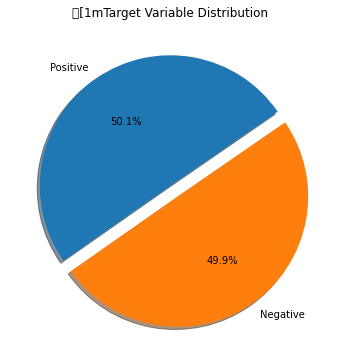

In [ ]:
#Let us first analyze the distribution of the target variable

print('\033[1mTarget Variable Distribution'.center(55))
plt.pie(df[target].value_counts(), labels=['Positive','Negative'], counterclock=False, shadow=True, 
        explode=[0,0.1], autopct='%1.1f%%', radius=1, startangle=215)
plt.title('\033[1mTarget Variable Distribution')
plt.show()

**Analysis:** The Target Variable seems to be perfectly balanced!

100%|██████████| 39723/39723 [00:14<00:00, 2707.89it/s]


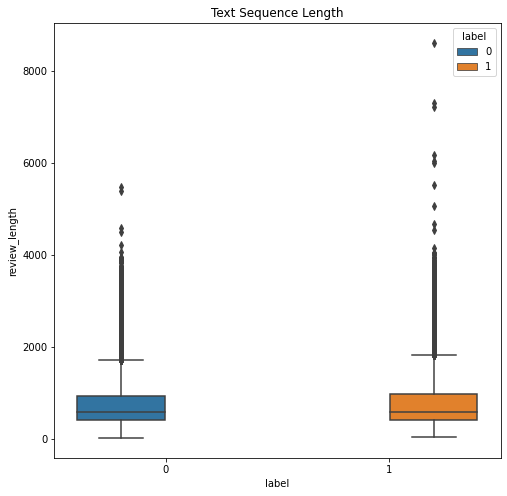

In [ ]:
#Visualising the average text length

df2 = df.copy()
df2['review_length'] = 0

for i in tqdm(range(df.shape[0])):
    df2['review_length'][i] = len(df2['text'][i])

plt.figure(figsize=[8,8])
sns.boxplot(x='label',y='review_length', data=df2, hue='label')
plt.title('Text Sequence Length')
plt.show()

**Analysis:** The Positive reviews are slightly longer on an average, compared to those with negative reviews.

In [ ]:
#Visualising the most frequent words

positivedata = df[df['label']== 1]
positivedata =positivedata['text']
negdata = df[df['label']== 0]
negdata= negdata['text']

def most_frequent_words(data):
    words = ' '.join(data)
    map = {}
    for word in words.split():
        if word in map:
            map[word] = map[word] + 1
        else:
            map[word] = 0
    map = sorted(map.items(), key=lambda item: item[1], reverse=True)
    # print(map)
    return map[:20]
        

print('Most-common Positive words', most_frequent_words(positivedata))
print('Most-common Negative words', most_frequent_words(negdata))


Most-common Positive words [('thi', 55011), ('br', 44570), ('film', 39084), ('movi', 34494), ('wa', 34422), ('hi', 26726), ('one', 21826), ('like', 16070), ('ha', 14355), ('veri', 12750), ('time', 12332), ('see', 11834), ('good', 11671), ('charact', 10989), ('stori', 10885), ('make', 10586), ('great', 10250), ('get', 10140), ('watch', 10020), ('love', 9780)]
Most-common Negative words [('thi', 63912), ('br', 46727), ('movi', 44353), ('wa', 41279), ('film', 34153), ('one', 20600), ('like', 19013), ('hi', 18650), ('make', 12252), ('even', 12123), ('ha', 12043), ('get', 12011), ('watch', 11632), ('good', 11514), ('time', 11382), ('bad', 11197), ('charact', 11009), ('would', 10789), ('onli', 10564), ('see', 10184)]


## 4. Building pipelines

In [ ]:
from sklearn.base import TransformerMixin

class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()

In [ ]:
MNB_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB()),
])

In [ ]:
LDA_clf = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range = (1,2), use_idf = False, max_features = 5000)),
    ('to_dense', DenseTransformer()), 
    ('clf', LinearDiscriminantAnalysis()),
])

First we convert the processed text to a matrix of TF-IDF features using TfidfVectorizer which is equivalent to CountVectorizer followed by TfidfTransformer.

## 5. Predictive modeling and Evaluation metrics

In [ ]:
#Splitting the data intro training & testing sets

X = df.drop(['label'],axis=1)
Y = df['label']
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X['text'], Y, train_size=0.8, test_size=0.2, random_state=0)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (39723, 1) (39723,) 
Training set  --->  (31778,) (31778,) 
Testing set   --->  (7945,)  (7945,)


In [ ]:
X['text'].head()

0    grew b watch love thunderbird mate school watc...
1    put thi movi dvd player sat coke chip expect w...
2    whi peopl know particular time past wa like fe...
3    even though great interest biblic movi wa bore...
4    im die hard dad armi fan noth ever chang got t...
Name: text, dtype: object

In [ ]:
Y.head()

0    0
1    0
2    0
3    0
4    1
Name: label, dtype: int64

In [ ]:
#Lets create a table to store the results of various models 

metrics = pd.DataFrame(np.zeros((2,5)), columns=['Accuracy', 'Precision','Recall','F1-score','AUC-ROC score'])
metrics.index=['Multinomial Naïve Bayes Classifier (NB)','Linear Discriminant Analysis (LDA)']
metrics


,Accuracy,Precision,Recall,F1-score,AUC-ROC score
Multinomial Naïve Bayes Classifier (NB),0.0,0.0,0.0,0.0,0.0
Linear Discriminant Analysis (LDA),0.0,0.0,0.0,0.0,0.0


In [ ]:
#Classification Summary Function
def Classification_Summary(pred,pred_prob,i):
    metrics.iloc[i]['Accuracy']=round(accuracy_score(Test_Y, pred),3)*100   
    metrics.iloc[i]['Precision']=round(precision_score(Test_Y, pred),3)*100 #, average='weighted'
    metrics.iloc[i]['Recall']=round(recall_score(Test_Y, pred),3)*100 #, average='weighted'
    metrics.iloc[i]['F1-score']=round(f1_score(Test_Y, pred),3)*100 #, average='weighted'
    metrics.iloc[i]['AUC-ROC score']=round(roc_auc_score(Test_Y, pred),3)*100 #, multi_class='ovr'
    print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3,'-'*35,metrics.index[i], '-'*35,'>'*3))
    print('Accuracy = {}%'.format(round(accuracy_score(Test_Y, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(Test_Y, pred),3)*100)) #, average='weighted'
    print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(Test_Y, pred))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(Test_Y, pred))
    
    auc_roc(Test_Y, pred_prob, curves=['each_class'])
    plt.show()


## 1. Multinomial Naive Bayes Classfier:

### Buiding pipeline and evaluation

<<<----------------------------------- Evaluating Multinomial Naïve Bayes Classifier (NB) ----------------------------------->>>

Accuracy = 85.7%
F1 Score = 85.3%

 Confusiton Matrix:
 [[3525  559]
 [ 575 3286]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      4084
           1       0.85      0.85      0.85      3861

    accuracy                           0.86      7945
   macro avg       0.86      0.86      0.86      7945
weighted avg       0.86      0.86      0.86      7945



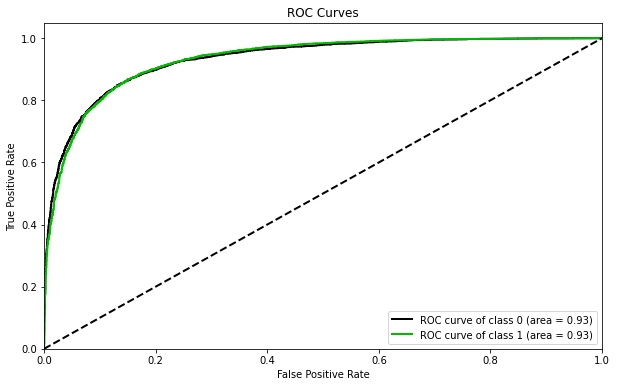

In [ ]:
# Fitting the Multinomial Naive Bayes Classifier

MNB = MNB_clf.fit(Train_X, Train_Y)
pred = MNB.predict(Test_X)
pred_prob = MNB.predict_proba(Test_X)
Classification_Summary(pred,pred_prob,0)

**Insights:** For the current problem statement, it is more important to focus on the F1-score. Except Decision Tree Classifier, most of the algorithms perform well. The best performing algorithm is Logistic Regression...

### Tuning the model/pipeline

In [ ]:
parameters = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__use_idf': (True, False),
    'clf__alpha': (1e-2, 1e-3),
}

gs_clf = GridSearchCV(MNB_clf, parameters, cv=5, n_jobs=-1)

<<<----------------------------------- Evaluating Multinomial Naïve Bayes Classifier (NB) ----------------------------------->>>

Accuracy = 88.6%
F1 Score = 88.2%

 Confusiton Matrix:
 [[3652  432]
 [ 475 3386]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89      4084
           1       0.89      0.88      0.88      3861

    accuracy                           0.89      7945
   macro avg       0.89      0.89      0.89      7945
weighted avg       0.89      0.89      0.89      7945



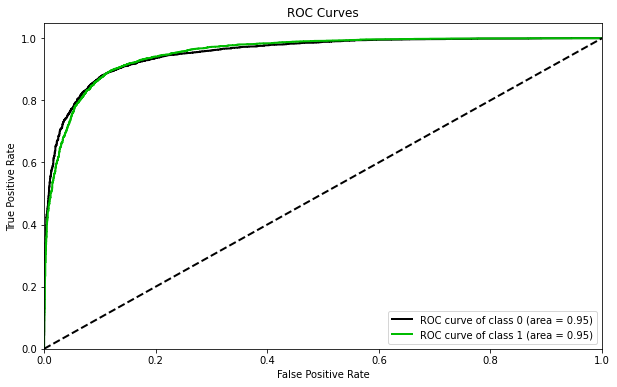

In [ ]:
gs_clf = gs_clf.fit(Train_X, Train_Y)
pred = gs_clf.predict(Test_X)
pred_prob = gs_clf.predict_proba(Test_X)
Classification_Summary(pred,pred_prob,0)

In [ ]:
gs_clf.best_params_

{'clf__alpha': 0.01, 'tfidf__ngram_range': (1, 2), 'tfidf__use_idf': False}

## 2. LDA

Principal Component Analysis (PCA) when applied identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data.

Whereas Linear Discriminant Analysis (LDA) tries to identify attributes that account for the most variance between classes. In particular, LDA, in contrast to PCA, is a supervised method, using known class labels.

<<<----------------------------------- Evaluating Linear Discriminant Analysis (LDA) ----------------------------------->>>

Accuracy = 86.9%
F1 Score = 86.6%

 Confusiton Matrix:
 [[3519  565]
 [ 478 3383]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      4084
           1       0.86      0.88      0.87      3861

    accuracy                           0.87      7945
   macro avg       0.87      0.87      0.87      7945
weighted avg       0.87      0.87      0.87      7945



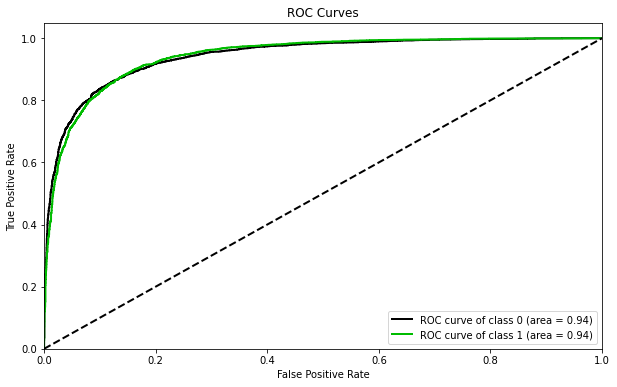

In [ ]:
# Fitting the Linear Discriminant Analysis Classifier

LDA = LDA_clf.fit(Train_X, Train_Y)
pred = LDA.predict(Test_X)
pred_prob = LDA.predict_proba(Test_X)
Classification_Summary(pred,pred_prob,1)

### Tuning the model/pipeline

In [ ]:
parameters = {
    'tfidf__max_features': (3000, 4000)
}

lda_clf = GridSearchCV(LDA_clf, parameters, cv=5)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(max_features=5000,
                                                        ngram_range=(1, 2),
                                                        use_idf=False)),
                                       ('to_dense',
                                        <__main__.DenseTransformer object at 0x7fd9d4db5a20>),
                                       ('clf', LinearDiscriminantAnalysis())]),
             param_grid={'tfidf__max_features': (3000, 4000)})
<<<----------------------------------- Evaluating Linear Discriminant Analysis (LDA) ----------------------------------->>>

Accuracy = 87.0%
F1 Score = 86.8%

 Confusiton Matrix:
 [[3516  568]
 [ 466 3395]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      4084
           1       0.86      0.88      0.87      3861

    accuracy         

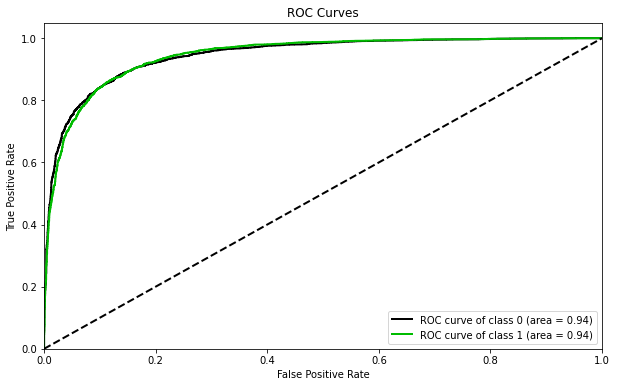

In [ ]:
lda_clf = lda_clf.fit(Train_X, Train_Y)
print(lda_clf)
pred = lda_clf.predict(Test_X)
pred_prob = lda_clf.predict_proba(Test_X)
Classification_Summary(pred,pred_prob,1)

In [ ]:
lda_clf.best_params_

{'tfidf__max_features': 3000}

In [ ]:
parameters = {
    'tfidf__max_features': (6000, 7000)
}

lda_clf = GridSearchCV(LDA_clf, parameters, cv=5)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(ngram_range=(1, 2),
                                                        use_idf=False)),
                                       ('to_dense',
                                        <__main__.DenseTransformer object at 0x7faaafb3e630>),
                                       ('clf', LinearDiscriminantAnalysis())]),
             param_grid={'tfidf__max_features': (6000, 7000)})
<<<----------------------------------- Evaluating Linear Discriminant Analysis (LDA) ----------------------------------->>>

Accuracy = 86.9%
F1 Score = 86.6%

 Confusiton Matrix:
 [[3524  560]
 [ 484 3377]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      4084
           1       0.86      0.87      0.87      3861

    accuracy                           0.87      7945
   macro avg       0.87      0.87      0.8

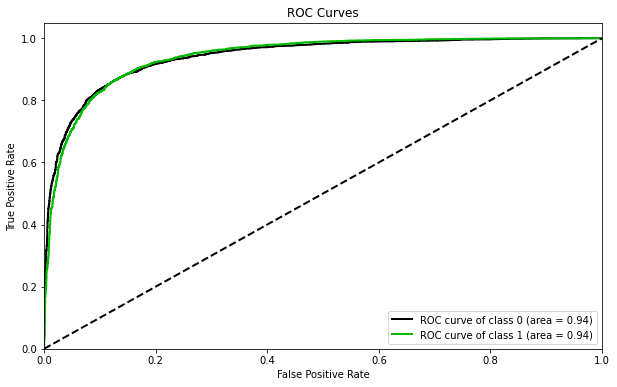

In [ ]:
lda_clf = lda_clf.fit(Train_X, Train_Y)
print(lda_clf)
pred = lda_clf.predict(Test_X)
pred_prob = lda_clf.predict_proba(Test_X)
Classification_Summary(pred,pred_prob,1)

In [ ]:
lda_clf.best_params_

{'tfidf__max_features': 6000}

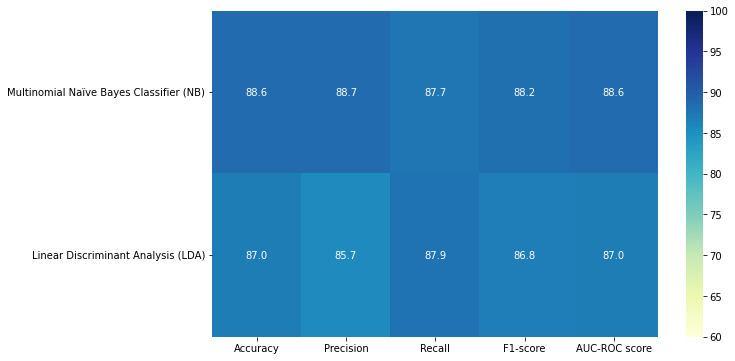

In [ ]:
#Comparing all the models Scores

sns.heatmap(metrics, annot=True, vmin=60, vmax=100.0, cmap='YlGnBu', fmt='.1f')
plt.show()

## Conclusion :

Through this experiment, I understood that the dataset is balanced by visualising the distribution of the target variable and gained various insights like the frequent words and average length belonging to them. Further more, I applied Naive Bayes and Linear Discriminant Analysis which on further fine-tuning gave 89% and 87% accuracy respectively. I also understood the difference between PCA and LDA such that PCA accounts for the most variance in the data while LDA accounts for the most variance between classes. LDA being a supervised learning method was able reduce the dimensionality of the input by projecting it to the most discriminative directions and hence we were able to the predict the reviews as positive or negative.

**References** -

1. https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#tutorial-setup
2. https://scikit-learn.org/stable/auto_examples/neighbors/plot_nca_dim_reduction.html?highlight=lda
3. https://www.geeksforgeeks.org/python-stemming-words-with-nltk/
4. https://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction.html
5. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
6. https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html